2 : 19
, : 183
4 : 22
6 : 26
8 : 13
5 : 10
1 : 28
9 : 24
0 : 23
7 : 17
3 : 20

 : 4
{'2': 19, ',': 183, '4': 22, '6': 26, '8': 13, '5': 10, '1': 28, '9': 24, '0': 23, '7': 17, '3': 20, '\n': 4}
[2, 4, 6, 8, 5, 1, 9, 0, 7, 3]
[19, 22, 26, 13, 10, 28, 24, 23, 17, 20]


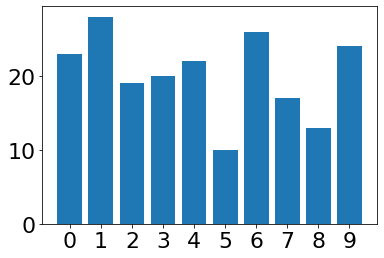

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import json

f = open('numbers.txt', 'r')
list = f.read()

frequency = {}
fKeys = []
fValues = []
for item in list:
   if (item in frequency):
      frequency[item] += 1
   else:
      frequency[item] = 1
for key, value in frequency.items():
   print("% s :% d" % (key, value))
   if (key != ',' and key != '\n'):
       fKeys.append(int(key))
       fValues.append(int(value)) 

print(frequency)
print(fKeys)
print(fValues)

plt.bar(fKeys, fValues)
plt.xticks(fKeys)
plt.show()


x = json.dumps(frequency)
f = open("dictionaryResults.json", "w")
f.write(x)
f.close()

In [81]:
%matplotlib inline
import matplotlib
import pandas as pd
import statistics

df = pd.read_csv('ViewingActivity-sample.csv')

df.shape
df.head(1)
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)
df.dtypes
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes
df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')


df = df.reset_index()

df.head(1)
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes
flix = df[df['Title'].str.contains('Star Trek: Deep Space Nine', regex=False)]
flix.shape
flix = flix[(flix['Duration'] > '0 days 00:01:00')]
flix.shape
flix['Duration'].sum()
flix['weekday'] = flix['Start Time'].dt.weekday
flix['hour'] = flix['Start Time'].dt.hour

flix.head()
flix.sort_index(axis=1, ascending=False)
print("Sum:", flix["Duration"].sum())
print("Average:", flix["Duration"].mean())
print("Median:", flix["Duration"].median())
print("Max:", flix["Duration"].max())
print("Min:", flix["Duration"].min())
print("Standard Deviation:", flix["Duration"].std())



Sum: 0 days 20:00:57
Average: 0 days 00:31:36.236842105
Median: 0 days 00:36:17
Max: 0 days 00:44:51
Min: 0 days 00:01:19
Standard Deviation: 0 days 00:14:37.111889506


<AxesSubplot:title={'center':'Episodes Watched by Hour'}>

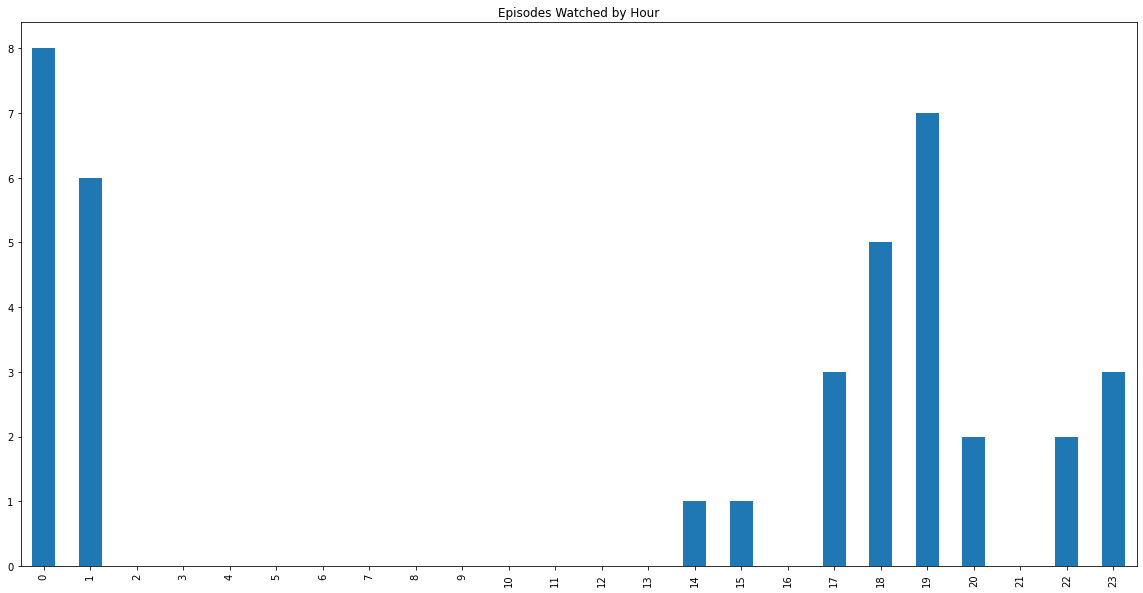

In [71]:

flix['hour'] = pd.Categorical(flix['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)


flix_by_hour = flix['hour'].value_counts()


flix_by_hour = flix_by_hour.sort_index()


flix_by_hour.plot(kind='bar', figsize=(20,10), title='Episodes Watched by Hour')



<AxesSubplot:title={'center':'Episodes Watched by Day'}>

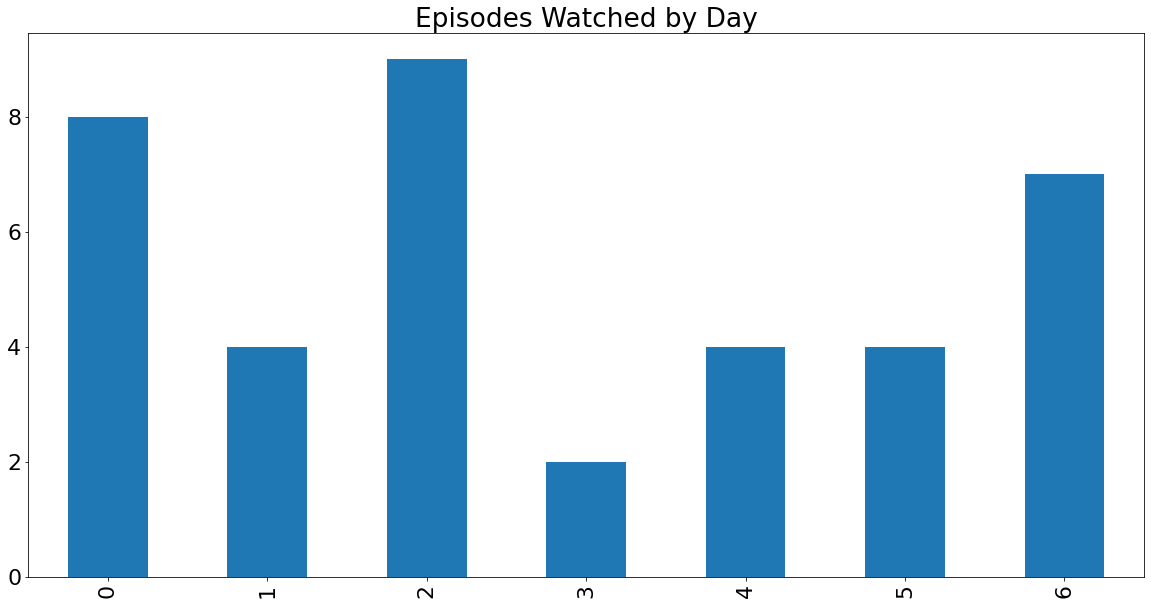

In [42]:


flix['weekday'] = pd.Categorical(flix['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

flix_by_day = flix['weekday'].value_counts()

flix_by_day = flix_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})

flix_by_day.plot(kind='bar', figsize=(20,10), title='Episodes Watched by Day')



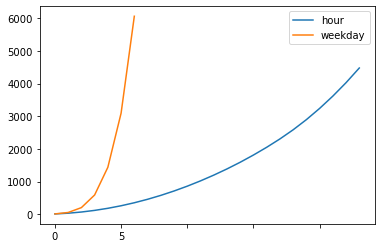

In [95]:
flix_by_day = flix_by_day.cumsum()
flix_by_hour = flix_by_hour.cumsum()
plt.figure()
flix_by_hour.plot()
flix_by_day.plot()
plt.legend()

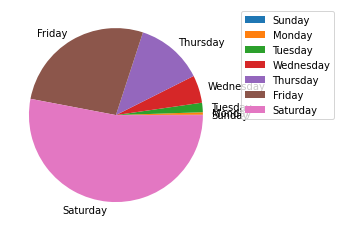

In [97]:
import matplotlib.pyplot as plt
import numpy as np

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.pie(flix_by_day, labels = weekdays)
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.show()